<a href="https://colab.research.google.com/github/arofenitra/stochastic-methods-of-AI-and-Modelling/blob/main/2_Distribution_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let $X$ be a random variable. Its
Cumulative Distribution Function (CDF) is $F_X(x)=P(X\leq x)$. If a derivative exists, then $P(x)=\frac{d}{dx}F_X(x)$.   
To sample a random variable using CDF, define $Y=F_X(X)$. For CDF monotonous, we have that $F_X^{-1}(x)$ exists and is unique. We have:
$$F_Y(y)=P(Y\leq y)=P(F_X(X)\leq y)=P(X\leq F_X^{-1}(y))=F_X\left(F_X^{-1}(y)\right)=y\in [0,1]$$
$$f_Y(y)=\frac{d}{dy}F_Y(y)=\biggr\{\begin{matrix}1 \text{ if } 0\leq y\leq 1 \\ 0 \text{  otherwise }\end{matrix} ⇒ Y\sim \text{Uniform}([0,1])=U_{[0,1]}$$
Algorithm of sampling:  
- Compute CDF and its inverse of distribution $X$.
- Generate a random number $y$ from $U_{[0,1]}$
- Compute $x=F_X^{-1}(y)$

$x$ is a generated number from the distribution $X$.   
Example in case of exponential distribution, cauchy distribution and gaussian.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy as sp


In [ ]:

x,λ,y=sym.symbols("x,λ,y")
#case of exponential distribution
#exponential pdf
exp_pdf=λ*sym.exp(-λ*x)
#exponential cdf
exp_cdf=1-sym.exp(-λ*x)
#exponential pdf as derivative of the pdf
exp_cdf_diff=sym.diff(exp_cdf,x)
#inverse of cdf
inv_cdf=sym.solve(exp_cdf-y,x)
print("case of exponential distribution of parameter λ")
print("cdf: ",exp_cdf)
print("pdf: ",exp_cdf_diff)
print("inverse for sampling : y=",inv_cdf)

#case of Cauchy-Lorentz distribution
a,γ,π=sym.symbols("a,γ,π")
#Cauchy-Lorentz pdf
cl_pdf=1/((γ*π)*(1+(x-a)**2/γ**2))
#Cauchy-Lorentz cdf
cl_cdf=1/2+sym.atan((x-a)/γ)/π
#Cauchy-Lorentz pdf as derivative of the pdf
cl_cdf_diff=sym.diff(cl_cdf,x)
#inverse of cdf
inv_cdf=sym.solve(cl_cdf-y,x)
print("case of Cauchy-Lorentz distribution of parameter a,γ")
print("cdf: ",cl_cdf)
print("pdf: ",cl_cdf_diff)
print("inverse for sampling : x=",inv_cdf)
#standard normal distribution
x,pi,y=sym.symbols("x, pi, y")
y=1/sym.sqrt(2*pi)*sym.exp(-x**2/2)
cdf_inv=0.5+0.5*sym.erf(x/sym.sqrt(2))
z=sym.symbols("z")
t=sym.solve(cdf_inv-z,x)
print("quantile for sampling:",t)


case of exponential distribution of parameter λ
cdf:  1 - exp(-x*λ)
pdf:  λ*exp(-x*λ)
inverse for sampling : y= [log(-1/(y - 1))/λ]
case of Cauchy-Lorentz distribution of parameter a,γ
cdf:  0.5 + atan((-a + x)/γ)/π
pdf:  1/(γ*π*(1 + (-a + x)**2/γ**2))
inverse for sampling : x= [a + γ*tan(π*(y - 0.5))]
quantile for sampling: [1.4142135623731*erfinv(2.0*z - 1.0)]


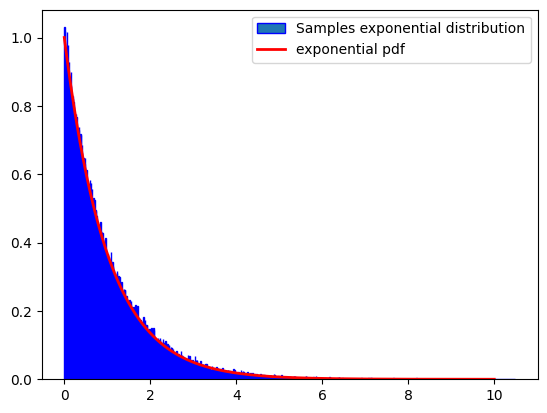

In [ ]:
# create a numerical function from the symbolic expression
#inv_cdf_num = sym.lambdify((y, a, γ, π), inv_cdf, 'numpy')

# define the values for Lambda
Lambda=1
# create a sample array X
X = np.random.uniform(0, 1, 10**5)

def exp_inverse_cdf(y,Lambda):
  epsilon=1e-7 # this is to avoid tan(pi/2)=infinite
  return np.log(-1/(y - 1))/Lambda
samples=exp_inverse_cdf(X,1)


# plot the histogram of the samples
plt.hist(samples, edgecolor="blue", bins=1000, density=True,label="Samples exponential distribution")

# plot the CDF of the Exponential distribution
x=np.linspace(0,10,10000)
y=Lambda*np.exp(-Lambda*x)
plt.plot(x, y, 'r-', lw=2, alpha=1, label='exponential pdf')

plt.legend()
plt.show()


### Box-Muller transform and Joint PDF of random variables

1. $X_1$ and $X_2$ are continuous random variables with joint PDF $f_{X_1,X_2}(x_1,x_2)$.
2. $Y_1=h_1(X_1,X_2),Y_2=h_2(X_1,X_2)$ and there is a unique solution $x_1=g_1(y_1,y_2), x_2=g_2(y_1,y_2)$.
3. Also $h_1$ and $h_2$ have continuous PDFs at all points $x_1,x_2$. i.e.
$$J(X_1,X_2)=\left| \begin{matrix}\frac{∂}{∂x_1}h_1 &\frac{∂}{∂x_2}h_1\\ \frac{∂}{∂x_1}h_2 &\frac{∂}{∂x_2}h_2\end{matrix}\right| \neq 0$$
Then $$f_{Y_1,Y_2}(y_1,y_2)=f_{X_1,X_2}(x_1,x_2)|J(X_1,X_2)|^{-1}$$
We have, for any set $A⊆\mathbb{R}^2$:  $$P\left((x_1,x_2)\in A\right)={∫}_Af_{X_1,X_2}(x_1,x_2)dxdy$$
The marginal PDF can be found
$$f_{X_1}(x_1)=∫_\mathbb{R}f_{X_1,X_2}(x_1,x_2)dx_2 \; \; ∀x_1 \in \mathbb{R}$$
$$f_{X_2}(x_2)=∫_\mathbb{R}f_{X_1,X_2}(x_1,x_2)dx_1 \; \; ∀x_2 \in \mathbb{R}$$

For the case of standard normal distribution $(μ,σ^2)=(0,1)$, we have for $X,Y$ random variables :  
$$f_{X,Y}(x,y)=\frac{1}{\sqrt{2π}}\exp{(-x^2/2)}\frac{1}{\sqrt{2π}}\exp{(-y^2/2)}=\frac{1}{2π}\exp{(-(x^2+y^2)/2)}$$
After taking its polar coordinate, we get :
$$\Biggr\{ \begin{matrix}x=R\cos(Θ) \\ y=Rsin(Θ)\end{matrix} ⇔\Biggr\{ \begin{matrix}R^2=x^2+y^2 \\ Θ=\arctan{(y/x)}\end{matrix}$$
$$J(X_1,X_2)=\left| \begin{matrix}\frac{x}{\sqrt{x^2+y^2}} & \frac{y}{\sqrt{x^2+y^2}} \\-\frac{y}{x^2+y^2} & \frac{x}{x^2+y^2}\end{matrix} \right|=\frac{1}{\sqrt{x^2+y^2}}=\frac{1}{R}$$
Hence we obtain:
$$⇒ Rf_{R,Θ}(r,θ)=f_{X,Y}(x,y)$$
The Box-Muller Transform has the form :
Suppose $U_1$ and $U_2$ are independent samples chosen from the uniform distribution on the unit interval $(0,1)$. Let $Z_0=Rcos(Θ)=\sqrt{-2\log{U_1}}\cos(2πU_2)$ and $Z_1=Rsin(Θ)=\sqrt{-2\log{U_1}}\sin(2πU_2)$. Then :

$Z_0$ and $Z_1$ are independant random variables with a standard normal distribution.


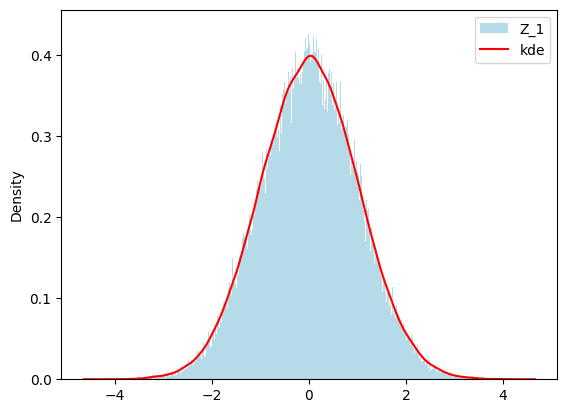

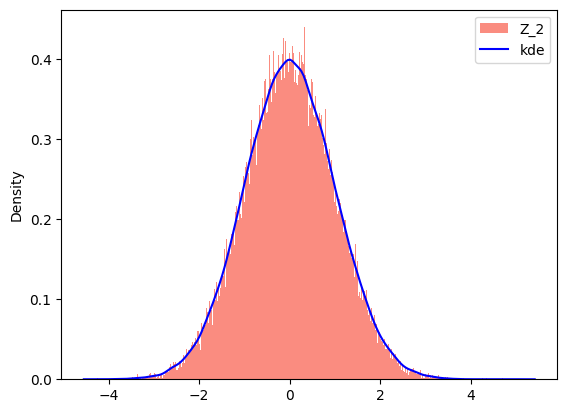

In [ ]:
import seaborn as sns
np.random.seed(10) #this is used for the seed for the pseudo Random Generator functions.
U1=np.random.uniform(0,1,100000)
U2=np.random.uniform(0,1,100000)
X1=-2*np.log(U1+1e-10) #to remove the case of log(0)
X2=(2*np.pi*U2)
Z1=np.sqrt(X1)*np.cos(X2)
plt.hist(Z1,bins=1000,color="lightblue",alpha=0.9,density=True,label="Z_1")
#this will plot the kde
sns.kdeplot(Z1,color="red",label="kde")
plt.legend()
plt.show()

Z2=np.sqrt(X1)*np.sin(X2)
plt.hist(Z2,bins=1000,color="salmon",alpha=0.9,density=True,label="Z_2")
#this will plot the kde
sns.kdeplot(Z2,color="blue",label="kde")
plt.legend()
plt.show()


## Sampling Uniform distribution
All of the above methods is dependant on uniform distribution $U_{[0,1]}$.  
For producing random numbers one usually uses a pseudo-random number generator (PRNG). A PRNG is an algorithm which delivers a sequence of deterministic numbers that imitate a sequence of random numbers. One of the simplest algorithms is called linear congruential generator (LCG). You are suggested to code and assess its quality. The LCG updates its state X in the following way
$$X_{n+1} = (aX_n + c) \text{mod}\; d,$$
where $d > 0$ is named as modulus, $a$ is the multiplier $(0 < a < d)$ and $c$ is called as an increment $(0 ≤ c < d)$. The initial state $X_0$ is called a seed $(0 ≤ X_0 < d)$.  

In [12]:
a=82537
c=23954
d=524287
x0=1
def X(a,c,d,x0): #generator
  x=np.zeros(d+1)
  x[0]=x0
  for i in range(1,d+1):
    x[i]=(((a%d)*(x[i-1]%d))%d+(c%d))%d
  return x/d

a,c,d,X0,n=82537,23964,327,1,100
print(np.max((X(a,c,d,x0)[:n])))



0.9938837920489296


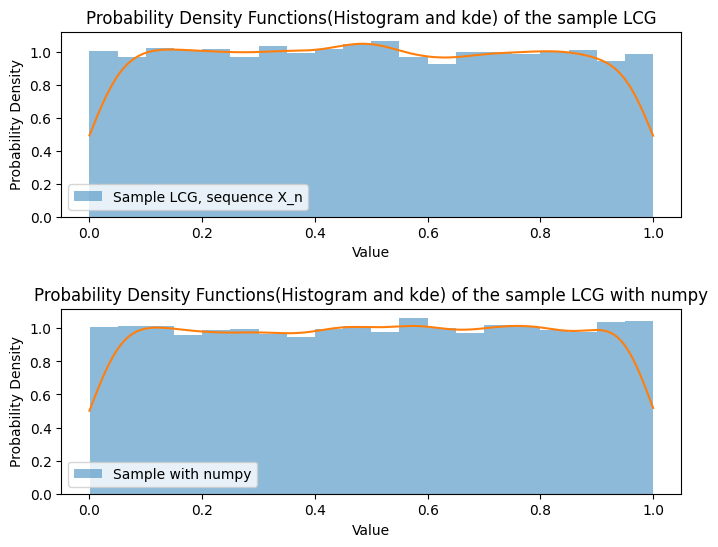

From PRNG: 
 mean  0.4978016971620505
 variance  0.08270928088103417
skewness 0.012969961644228879
 kurtosis  -1.1907217913223462
from numpy
 mean  0.5020441692313002
 variance  0.0839053524856811
skewness -0.011003463136201543
 kurtosis  -1.20320510871157


In [22]:

import scipy as sp
from scipy.stats import gaussian_kde,kstest,anderson,uniform #module for statistics
from statsmodels.graphics.tsaplots import plot_acf
def implementation_LCG(a,c,d,X0,n): #this will give a list of [X0,...,Xn]
    X=[0]*(n+1)
    X[0]=X0

    for i in range(1,n+1):
        X[i]=(((a%d)*(X[i-1]%d))%d+c%d)%d

    return X

def generation_sample_uniform(a,c,d,X0,n): #this is [X_i/d]
    X=[0]*(n+1)
    X[0]=X0
    result=[0]*(n+1)
    result[0]=X[0]/d
    for i in range(1,n+1):
        X[i]=(((a%d)*(X[i-1]%d))%d+c%d)%d
        result[i]=X[i]/d
    return result

'''sample of 100 numbers from Uniform [0,1] with X0=1,a=82537, c=23964,d=327
'''
a,c,d,X0,n=82537,23964,524287,1,10000

LCG=implementation_LCG(a,c,d,X0,n)

sample_LCG=generation_sample_uniform(a,c,d,X0,n)[1:]




def generator_sample_numpy(n):
  default_rng=np.random.default_rng(1)
  return [default_rng.random() for _ in range(n)]

sample_numpy=generator_sample_numpy(n)


sample_LCG=np.array(sample_LCG)
sample_numpy=np.array(sample_numpy)


# Create subplots with adjusted spacing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
x_grid=np.linspace(0,1,10000) #for the approximation of KDE

ax1=plt.subplot(211)
#using histogram
plt.hist(sample_LCG, bins=20, density=True, alpha=0.5, label='Sample LCG, sequence X_n')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions(Histogram and kde) of the sample LCG')
plt.legend()
#using kernel density estimation
kde_LCG = gaussian_kde(sample_LCG)
pdf_LCG = kde_LCG(x_grid)
plt.plot(x_grid, pdf_LCG, label='LCG Sample')

ax2=plt.subplot(212)
#using histogram
plt.hist(sample_numpy, bins=20, density=True, alpha=0.5, label='Sample with numpy')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions(Histogram and kde) of the sample LCG with numpy')
plt.legend()
#using kernel density estimation
kde_numpy = gaussian_kde(sample_numpy)
pdf_numpy= kde_numpy(x_grid)
plt.plot(x_grid, pdf_numpy, label='numpy Sample')

# Show the plot
plt.show()

mean_LCG=np.mean(sample_LCG)
variance_LCG=np.var(sample_LCG)
skewness_LCG=sp.stats.skew(sample_LCG)
kurtosis_LCG=sp.stats.kurtosis(sample_LCG)
A_LCG={" mean ":mean_LCG," variance ":variance_LCG,"skewness":skewness_LCG, " kurtosis ":kurtosis_LCG}

mean_numpy=np.mean(sample_numpy) #expected value
variance_numpy=np.var(sample_numpy) #variance
skewness_numpy=sp.stats.skew(sample_numpy) #skewness
kurtosis_numpy=sp.stats.kurtosis(sample_numpy) #kurtosis
A_numpy={" mean ":mean_numpy," variance ":variance_numpy,"skewness":skewness_numpy, " kurtosis ":kurtosis_numpy}
print("From PRNG: ")
for x in A_LCG:
  print(x,A_LCG[x])
print("from numpy")
for x in A_numpy:
  print(x,A_numpy[x])